In [187]:
# Importing Libraries
import numpy as np # LIBRARY IMPORT FOR LINEAR ALGEBRA
import pandas as pd # LIBRARY IMPORT FOR DATA PROCESSING
from sklearn.model_selection import train_test_split # MODULE IMPORT FOR DATA SPLITTING

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [188]:
# 1. load your training data
#Loading Data set
Stock_Data = pd.read_csv('./q2_dataset.csv')

In [189]:
Stock_Data

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91
...,...,...,...,...,...,...
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21


In [190]:
Stock_Data['Date'] =pd.to_datetime(Stock_Data.Date)
Stock_Data=Stock_Data.sort_values(by='Date') # This now sorts in date order
Stock_Data

,Date,Close/Last,Volume,Open,High,Low
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58
...,...,...,...,...,...,...
4,2020-07-01,$364.11,27684310,365.12,367.36,363.91
3,2020-07-02,$364.11,28510370,367.85,370.47,363.64
2,2020-07-06,$373.85,29663910,370.00,375.78,369.87
1,2020-07-07,$372.69,28106110,375.41,378.62,372.23


In [191]:
store_data=np.zeros((1258,13))
store_data.shape

(1258, 13)

In [192]:
# The dataset was created in such a way to predict the next day opening price using the past 3 days Open, High, and Low prices and volume. 
# So each sample contains 12 features and 1 target. 

for i in range(len(store_data)-2):
    store_data[i][12]=Stock_Data.iloc[i+3][3] #target

    store_data[i][0]=Stock_Data.iloc[i+2][3] #open -1
    store_data[i][1]=Stock_Data.iloc[i+1][3] #open -2
    store_data[i][2]=Stock_Data.iloc[i][3] #open -3

    store_data[i][3]=Stock_Data.iloc[i+2][4] #High -1
    store_data[i][4]=Stock_Data.iloc[i+1][4] #High -2
    store_data[i][5]=Stock_Data.iloc[i][4] #High -3

    store_data[i][6]=Stock_Data.iloc[i+2][5] #Low -1
    store_data[i][7]=Stock_Data.iloc[i+1][5] #Low -2
    store_data[i][8]=Stock_Data.iloc[i][5] #Low -3

    store_data[i][9]=Stock_Data.iloc[i+2][2] #Volume -1
    store_data[i][10]=Stock_Data.iloc[i+1][2] #Volume -2
    store_data[i][11]=Stock_Data.iloc[i][2] #Volume -3

In [193]:
col_names=['Open-1','Open-2','Open-3','High-1','High-2','High-3','Low-1','Low-2','Low-3','Volume-1','Volume-2','Volume-3','Target']
df=pd.DataFrame(store_data[:-2,:],columns=col_names)

In [194]:
df

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
0,125.03,121.94,123.85,125.76,123.85,124.06,124.32,121.21,119.22,41365600.0,61292800.0,78291510.0,126.04
1,126.04,125.03,121.94,126.37,125.76,123.85,125.04,124.32,121.21,31695870.0,41365600.0,61292800.0,125.72
2,125.72,126.04,125.03,127.15,126.37,125.76,125.58,125.04,124.32,33559770.0,31695870.0,41365600.0,127.74
3,127.74,125.72,126.04,128.57,127.15,126.37,127.35,125.58,125.04,35987630.0,33559770.0,31695870.0,129.08
4,129.08,127.74,125.72,129.62,128.57,127.15,128.31,127.35,125.58,45970470.0,35987630.0,33559770.0,130.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,360.08,353.25,364.41,365.98,362.17,365.32,360.00,351.28,353.02,35055820.0,32661520.0,51314210.0,365.12
1252,365.12,360.08,353.25,367.36,365.98,362.17,363.91,360.00,351.28,27684310.0,35055820.0,32661520.0,367.85
1253,367.85,365.12,360.08,370.47,367.36,365.98,363.64,363.91,360.00,28510370.0,27684310.0,35055820.0,370.00
1254,370.00,367.85,365.12,375.78,370.47,367.36,369.87,363.64,363.91,29663910.0,28510370.0,27684310.0,375.41


In [195]:
data=df.drop(['Target'],axis=1)

In [196]:
data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3
0,125.03,121.94,123.85,125.76,123.85,124.06,124.32,121.21,119.22,41365600.0,61292800.0,78291510.0
1,126.04,125.03,121.94,126.37,125.76,123.85,125.04,124.32,121.21,31695870.0,41365600.0,61292800.0
2,125.72,126.04,125.03,127.15,126.37,125.76,125.58,125.04,124.32,33559770.0,31695870.0,41365600.0
3,127.74,125.72,126.04,128.57,127.15,126.37,127.35,125.58,125.04,35987630.0,33559770.0,31695870.0
4,129.08,127.74,125.72,129.62,128.57,127.15,128.31,127.35,125.58,45970470.0,35987630.0,33559770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,360.08,353.25,364.41,365.98,362.17,365.32,360.00,351.28,353.02,35055820.0,32661520.0,51314210.0
1252,365.12,360.08,353.25,367.36,365.98,362.17,363.91,360.00,351.28,27684310.0,35055820.0,32661520.0
1253,367.85,365.12,360.08,370.47,367.36,365.98,363.64,363.91,360.00,28510370.0,27684310.0,35055820.0
1254,370.00,367.85,365.12,375.78,370.47,367.36,369.87,363.64,363.91,29663910.0,28510370.0,27684310.0


In [197]:
#the dataset was randomized to create ‘train_data_RNN.csv’ and ‘test_data_RNN.csv.
ran = 0
X_train, X_test, y_train, y_test = train_test_split(data, df['Target'], test_size=0.3, random_state = ran) 

In [198]:
train_data=pd.concat([X_train,y_train],axis=1)

In [199]:
train_data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
689,170.97,172.58,164.88,172.48,174.23,172.01,168.20,172.08,164.77,34949690.0,26750260.0,34581850.0,169.88
1134,311.64,310.60,307.24,317.07,312.67,310.43,311.15,308.25,306.20,30521720.0,35217270.0,42621540.0,316.70
901,168.99,172.40,174.65,170.66,173.94,175.57,168.42,170.34,172.85,23793830.0,31644240.0,28204640.0,171.05
579,157.23,156.91,156.29,157.83,157.55,157.42,156.78,155.27,156.20,16916650.0,21175670.0,17633730.0,159.29
367,116.35,116.80,116.74,116.51,117.40,117.50,115.64,116.78,116.68,26043820.0,23724430.0,21337310.0,115.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,190.68,191.78,189.69,191.96,192.43,192.55,189.56,190.17,189.69,15955820.0,20670830.0,20182050.0,192.45
835,219.05,216.88,211.15,222.36,220.45,215.18,216.81,216.62,209.27,52954070.0,38016810.0,36487930.0,209.55
1216,308.10,305.64,303.22,317.05,310.35,305.17,307.24,304.29,301.97,36486560.0,33511990.0,28803760.0,317.83
559,153.89,153.80,151.78,154.28,154.72,153.92,152.70,153.54,151.69,21983410.0,25402270.0,35907770.0,153.21


In [200]:
y_test = y_test.reindex(X_test.index)

In [201]:
test_data=pd.concat([X_test,y_test],axis=1)

In [202]:
test_data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
5,130.97,129.08,127.74,132.97,129.62,128.57,130.70,128.31,127.35,55204920.0,45970470.0,35987630.0,132.85
494,145.01,147.17,145.13,146.16,148.28,147.16,143.62,145.38,145.11,24725210.0,25674500.0,35421310.0,144.49
52,113.25,113.63,113.38,115.50,114.72,114.18,112.37,113.30,112.52,50061580.0,35678360.0,50278030.0,116.44
983,186.51,183.08,184.28,191.92,185.47,184.99,185.77,182.15,181.14,30684390.0,22526310.0,29773430.0,191.81
186,109.95,110.23,109.51,110.42,110.98,110.73,108.12,109.20,109.42,31735810.0,26178840.0,26560420.0,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111.07,111.94,112.18,111.99,112.80,112.68,108.80,110.35,109.79,56157370.0,53168580.0,64678220.0,112.02
1021,213.90,216.42,208.76,218.03,221.37,210.16,206.74,211.30,207.31,54017920.0,69281360.0,33935720.0,205.53
506,147.97,145.50,145.87,149.33,148.49,146.18,147.33,145.44,144.82,20117070.0,25080500.0,24833800.0,148.82
1202,276.28,277.95,284.69,277.25,281.68,286.95,265.43,276.85,276.86,45247890.0,32503750.0,53812480.0,273.61


In [203]:
train_data.to_csv(r'./train_data_RNN.csv', index = False, header=True)

In [204]:
test_data.to_csv(r'./test_data_RNN.csv', index = False, header=True)

In [205]:
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [206]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [207]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [208]:
X_train.shape[0],X_train.shape[1]

(879, 12)

In [209]:
# Building a Model
model = Sequential()
#adding LSTM layer with 50 LSTM units
model.add(LSTM(50,input_shape=(X_train.shape[1],1),return_sequences=True))
#adding LSTM layer with 150 LSTM units
model.add(LSTM(150))
#adding dense layer
model.add(Dense(1,activation='linear'))

#'mean_squared_error' has been used as loss function
# Optimizer: Here adam optimizer has been used. 
# Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for
# training deep neural networks.

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [210]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 12, 50)            10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 150)               120600    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 131,151
Trainable params: 131,151
Non-trainable params: 0
_________________________________________________________________


In [211]:
History = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,batch_size=64,verbose=1)

Epoch 1/600
14/14 [==============================] - 3s 58ms/step - loss: 32823.2578 - mae: 169.9951 - val_loss: 33070.0195 - val_mae: 171.7102
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 29118.8945 - mae: 158.6777 - val_loss: 29779.0137 - val_mae: 161.2525
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 27390.4277 - mae: 153.0391 - val_loss: 28760.2734 - val_mae: 158.0440
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 26541.5762 - mae: 150.2215 - val_loss: 27964.2383 - val_mae: 155.4999
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 25810.9980 - mae: 147.7683 - val_loss: 27230.8906 - val_mae: 153.1229
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 25126.0938 - mae: 145.4339 - val_loss: 26534.3984 - val_mae: 150.8311
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 24471.8379 - mae: 143.1727 - val_loss: 25868.6152 - val_mae: 148.607

In [212]:
model.save('./Group25_RNN_model.h5')

In [213]:
def plot_loss(history):
  # summarize history for loss
  plt.plot(history.history['loss'],marker = 'o')
  plt.plot(history.history['val_loss'], marker = 'o')
  plt.title('model loss vs epoch')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_mae(history):
  # summarize history for accuracy
  plt.figure(figsize=(20,10))
  plt.plot(history.history['mae'],marker = 'o')
  plt.plot(history.history['val_mae'],marker = 'o')
  plt.title('model mean absolute error vs epoch')
  plt.ylabel('mean absolute error')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

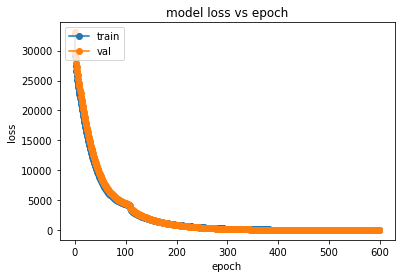

In [214]:
import matplotlib.pyplot as plt
plot_loss(History)


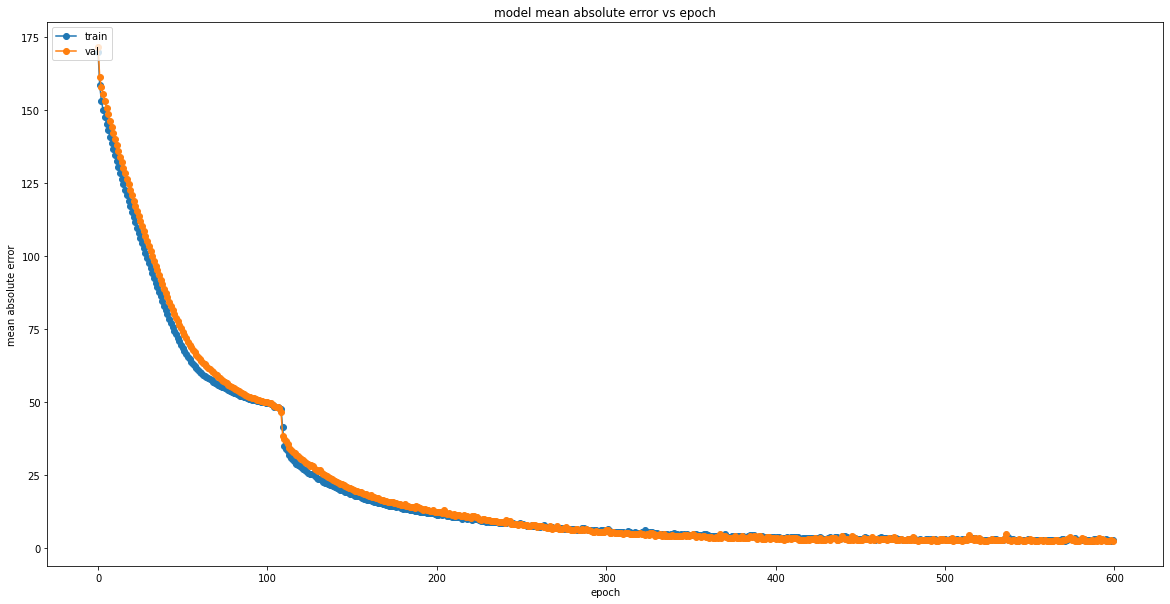

In [215]:
plot_mae(History)

In [216]:
y_test=np.array(y_test)

In [217]:
y_pred = model.predict(X_test)

In [219]:
scores=model.evaluate(X_test,y_test)

12/12 [==============================] - 1s 4ms/step - loss: 16.8730 - mae: 2.6884


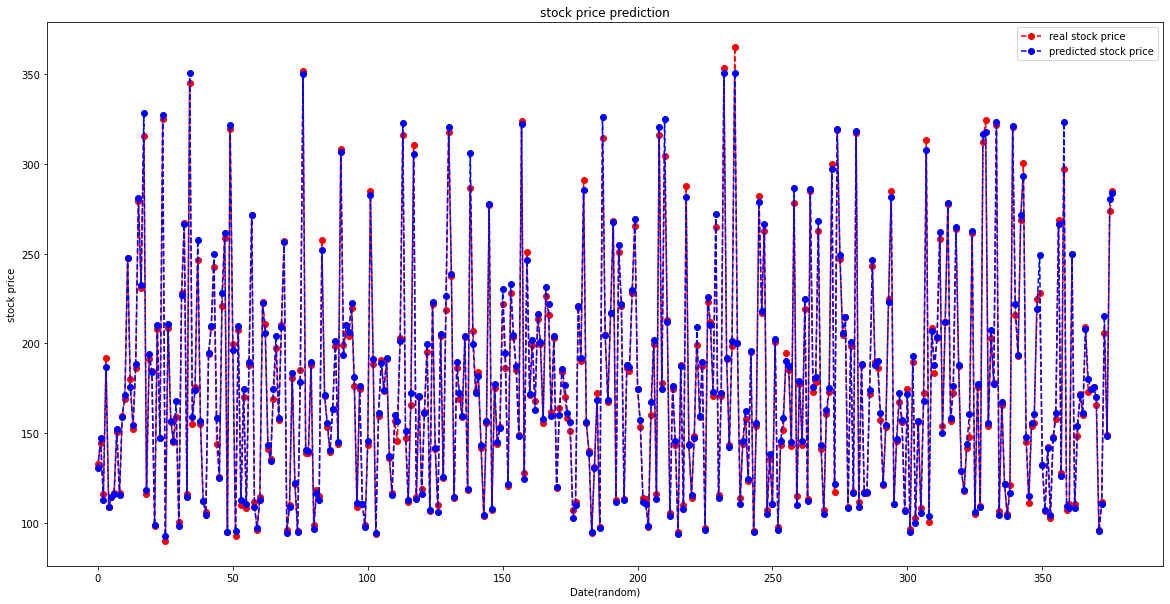

In [218]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="red", marker='o', linestyle='dashed', label="real stock price")
plt.plot(y_pred, color="blue", marker='o', linestyle='dashed', label="predicted stock price")
plt.title("stock price prediction")
plt.xlabel("Date(random)")
plt.ylabel("stock price")
plt.legend()
plt.show()